# Analyzing Text about Artificial Intelligence

In this notebook, we experiment with a wikipedia article on artificial intelligence. You can see that, this article contains a lot of terms, this making the analysis more problematic. We need to come up with another way to clean up the data after doing keyword extraction, to get rid of some frequent, but not meaningful word combinations.

## Goal

In this lesson, we will be discussing concepts related to Data Science by doing some **text mining**. We will start with a text about artificial intelligence, extract keywords from it, and then try to visualize the result.

In [1]:
url = "https://en.wikipedia.org/wiki/Artificial_intelligence"

## Step 1: Getting the Data

First step in every data science process is getting the data. We will use `requests` library to do that:

In [2]:
import requests

text = requests.get(url).content.decode("utf-8")
text[:1000]

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Artificial intelligence - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled ve

## Step 2: Transforming the Data

The next step is to convert the data into the form suitable for processing. In our case, we have downloaded HTML source code from the page, and we need to convert it into plain text.

There are many ways this can be done. We will use the simplest build-in [`HTMLParser`](https://docs.python.org/3/library/html.parser.html) object from Python. We need to subclass the HTMLParser class and define the code that will collect all text inside HTML tags, except `<script>` and `<style>` tags.

In [3]:
from html.parser import HTMLParser


class MyHTMLParser(HTMLParser):
    script = False
    res = ""

    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script", "style"]:
            self.script = True

    def handle_endtag(self, tag):
        if tag.lower() in ["script", "style"]:
            self.script = False

    def handle_data(self, data):
        if str.strip(data) == "" or self.script:
            return
        self.res += " " + data.replace("[ edit ]", "")


parser = MyHTMLParser()
parser.feed(text)

text = parser.res
text[:1000]

' Artificial intelligence - Wikipedia Jump to content Main menu Main menu move to sidebar hide \n\t\tNavigation\n\t Main page Contents Current events Random article About Wikipedia Contact us Donate \n\t\tContribute\n\t Help Learn to edit Community portal Recent changes Upload file Search Search Appearance Create account Log in Personal tools Create account Log in \n\t\tPages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Goals Toggle Goals subsection 1.1 Reasoning and problem-solving 1.2 Knowledge representation 1.3 Planning and decision-making 1.4 Learning 1.5 Natural language processing 1.6 Perception 1.7 Social intelligence 1.8 General intelligence 2 Techniques Toggle Techniques subsection 2.1 Search and optimization 2.1.1 State space search 2.1.2 Local search 2.2 Logic 2.3 Probabilistic methods for uncertain reasoning 2.4 Classifiers and statistical learning methods 2.5 Artificial neural networks 2.6 Deep learning 2.7 GPT 2.8 Specialize

## Step 3: Getting Insights

The most important step is to turn our data into some for from which we can draw insights. In our case, we want to extract keywords from the text, and see which keywords are more meaningful.

We will use Python library called [RAKE](https://github.com/aneesha/RAKE) for keyword extraction. First, let's install this library in case it is not present:

In [4]:
!poetry add nlp_rake

The following packages are already present in the pyproject.toml and will be skipped:

  - nlp_rake

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


The main functionality is available from `Rake` object, which we can customize using some parameters. In our case, we will set the minimum length of a keyword to 5 characters, minimum frequency of a keyword in the document to 3, and maximum number of words in a keyword - to 2. Feel free to play around with other values and observe the result.

In [5]:
import nlp_rake

extractor = nlp_rake.Rake(max_words=2, min_freq=3, min_chars=5)
res = extractor.apply(text)
res

[('autonomous vehicles', 4.0),
 ('21st century', 4.0),
 ('speech recognition', 4.0),
 ('gradient descent', 4.0),
 ('neural networks', 4.0),
 ('data centers', 4.0),
 ('bad actors', 4.0),
 ('algorithmic bias', 4.0),
 ('existential risk', 4.0),
 ('elon musk', 4.0),
 ('scientific american', 4.0),
 ('issn 0261-3077', 4.0),
 ('ars technica', 4.0),
 ('fox news', 4.0),
 ('2nd ed', 4.0),
 ('bbc news', 4.0),
 ('^ wong', 3.9957805907173),
 ('ai winter', 3.99290780141844),
 ('regulate ai', 3.99290780141844),
 ('strong ai', 3.99290780141844),
 ('ai magazine', 3.99290780141844),
 ('recommendation systems', 3.909090909090909),
 ('ai systems', 3.901998710509349),
 ('affective computing', 3.9),
 ('make decisions', 3.888888888888889),
 ('artificial intelligence', 3.884892086330935),
 ('intelligence explosion', 3.884892086330935),
 ('modern ai', 3.86790780141844),
 ('deep learning', 3.8),
 ('training data', 3.8),
 ('united states', 3.8),
 ('turing test', 3.7333333333333334),
 ('commonsense knowledge', 3.

We obtained a list terms together with associated degree of importance. As you can see, the most relevant disciplines, such as neural networks, autonomous vehicles, and speech recognition, are present in the list at top positions.

## Step 4: Visualizing the Result

People can interpret the data best in the visual form. Thus it often makes sense to visualize the data in order to draw some insights. We can use `matplotlib` library in Python to plot simple distribution of the keywords with their relevance:

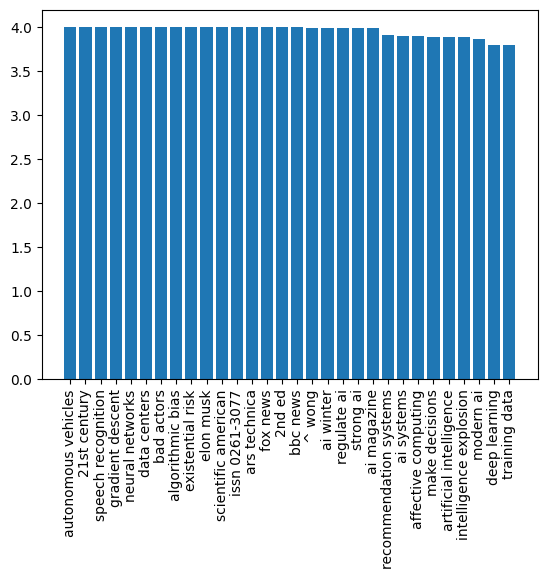

In [6]:
import matplotlib.pyplot as plt


def plot(pair_list):
    k, v = zip(*pair_list)
    plt.bar(range(len(k)), v)
    plt.xticks(range(len(k)), k, rotation="vertical")
    plt.show()


plot(res[:30])

There is, however, even better way to visualize word frequencies - using **Word Cloud**. We will need to install another library to plot the word cloud from our keyword list.

In [7]:
!poetry add wordcloud

The following packages are already present in the pyproject.toml and will be skipped:

  - wordcloud

If you want to update it to the latest compatible version, you can use `poetry update package`.
If you prefer to upgrade it to the latest available version, you can use `poetry add package@latest`.

Nothing to add.


`WordCloud` object is responsible for taking in either original text, or pre-computed list of words with their frequencies, and returns and image, which can then be displayed using `matplotlib`:

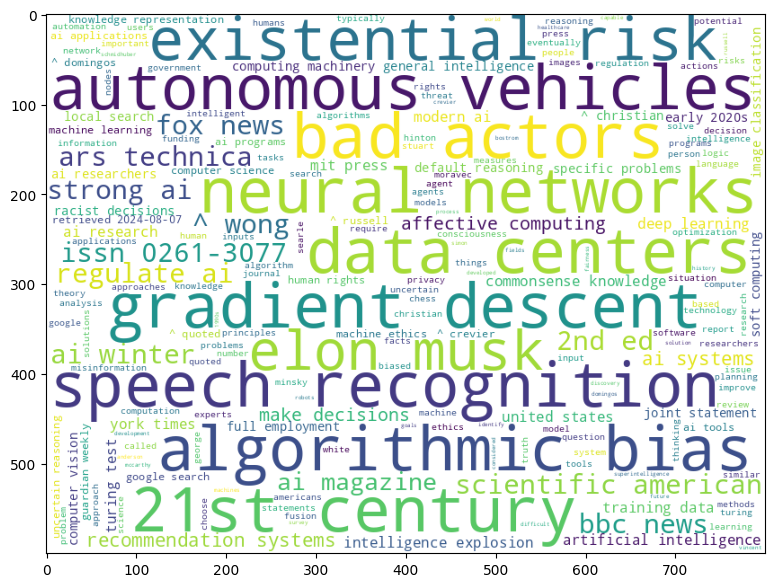

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(background_color="white", width=800, height=600)
plt.figure(figsize=(15, 7))
plt.imshow(wc.generate_from_frequencies({k: v for k, v in res}))
plt.show()

We can also pass in the original text to `WordCloud` - let's see if we are able to get similar result:

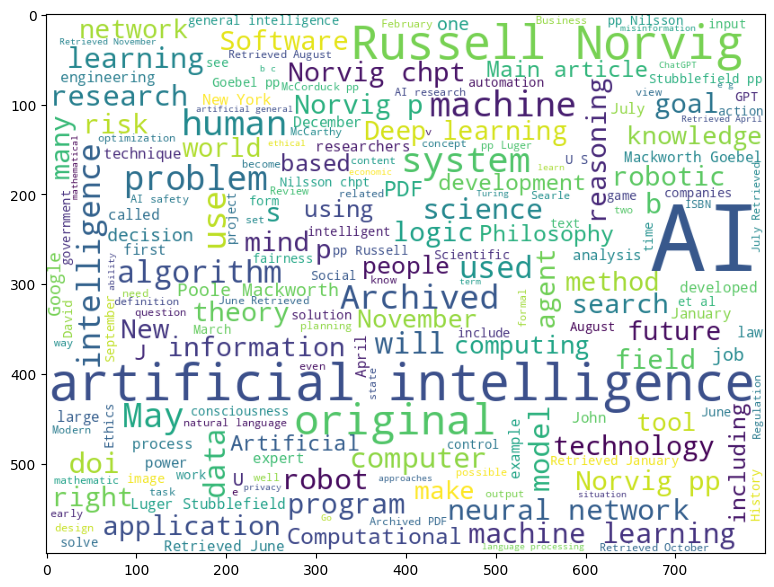

In [9]:
plt.figure(figsize=(15, 7))
plt.imshow(wc.generate(text))
plt.show()

You can see that word cloud now looks more impressive, but it also contains a lot of noise (eg. unrelated words such as including). Also, we get fewer keywords that consist of two words, such as neural networks or gradient descent. This is because RAKE algorithm does much better job at selecting good keywords from text. This example illustrates the importance of data pre-processing and cleaning, because clear picture at the end will allow us to make better decisions.

In this exercise we have gone through a simple process of extracting some meaning from Wikipedia text, in the form of keywords and word cloud. This example is quite simple, but it demonstrates well all typical steps a data scientist will take when working with data, starting from data acquisition, up to visualization.